# Importing Libraries

In [1]:
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
import numpy as np
import pandas as pd
import regex as re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import plotly.express as px
import plotly.graph_objects as goa
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.preprocessing import OrdinalEncoder
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ankith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ankith/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/ankith/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/ankith/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
train_df = pd.read_csv("twitter_training.csv")
# Label the columns
train_df.columns = ["tweet_id", "place", "sentiments", "tweets"]
train_df = train_df.drop("place", axis=1)
# removing duplicates

train_df.drop_duplicates(inplace=True)

# Remove the duplicate rows
train_df = train_df.drop_duplicates()

train_df["tweets"] = train_df["tweets"].astype(str)


stopw = set(stopwords.words("english"))

print(stopw)
train_df["tweets"] = train_df["tweets"].apply(
    lambda x: " ".join(
        [word.lower() for word in x.split() if word.lower() not in stopw]
    )
)


def convert_list_to_str(l):
    st = ""
    for i in l:
        st = st + i + " "
    st = st[:-1]
    return st


tokenizer = RegexpTokenizer(r"\w+|\d+")
train_df["tweets_new"] = train_df["tweets"].apply(tokenizer.tokenize)
train_df["tweets_new"] = train_df["tweets_new"].apply(convert_list_to_str)


lemmatizer = WordNetLemmatizer()


def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith("J"):
        return wordnet.ADJ
    elif treebank_tag.startswith("V"):
        return wordnet.VERB
    elif treebank_tag.startswith("N"):
        return wordnet.NOUN
    elif treebank_tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no mapping found


def lemmatize_sentence(sentence):
    # tokenizer = RegexpTokenizer(r'\w+')
    # words = word_tokenize(sentence)
    words = sentence.split()
    pos_tags = nltk.pos_tag(words)
    lemmatizer = WordNetLemmatizer()

    lemmatized_words = [
        lemmatizer.lemmatize(word, get_wordnet_pos(pos_tag))
        for word, pos_tag in pos_tags
    ]
    return " ".join(lemmatized_words)


def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)


train_df["tweets_new"] = train_df["tweets_new"].apply(lemmatize_sentence)

train_df["tweets"] = train_df["tweets_new"]

# df["tweets"] = df["tweets_new"].apply(convert_list_to_str)
train_df = train_df.drop(columns=["tweets_new"])
# print(df)

# fill 0 in mum
train_df["tweets"] = train_df["tweets"].fillna(0)

train_df_copy = train_df.copy()

ordinal_encoder = OrdinalEncoder()

# Every single column with categorical values will be converted.
object_cols = ["sentiments"]
train_df_copy[object_cols] = train_df_copy[object_cols].astype(str)

train_df_copy[object_cols] = ordinal_encoder.fit_transform(train_df_copy[object_cols])

{'was', 'no', 'more', 'doesn', 'why', 'nor', 'me', 'further', 'myself', 's', 'he', 'does', "shan't", 'while', 'an', 'few', "mustn't", "shouldn't", "it's", 'a', 'needn', 'which', 'ourselves', 'is', 'having', 'any', 'and', 'they', 'what', 'y', 'am', 'these', 'don', 'doing', 'were', "couldn't", 'who', "wasn't", 'during', 'into', 'them', 'i', 'there', 'herself', 'yourselves', 'only', 'through', 'when', 'now', 'him', 'yourself', 'to', 'as', 'wouldn', 'o', 'off', 'other', "should've", 'your', "mightn't", "hadn't", 'until', 'each', 'mightn', 'all', 'shouldn', 'then', 're', 'my', 'just', 'aren', 'too', "haven't", 'can', 'on', 'both', 'hers', 'yours', 'being', 'because', 'itself', 'under', 'after', 'where', "wouldn't", "aren't", 'be', 'll', "she's", 'we', "isn't", 'in', 'again', 'same', 'will', 'or', 'from', 'some', 'm', "that'll", "weren't", 'weren', 'so', 'our', 'won', 'should', 'how', "needn't", 'not', "hasn't", 'hadn', 'of', 'above', 'haven', 'shan', 'out', 'its', 'have', 'his', 'if', "don'

# Test Data Preprocessing

In [3]:
df = pd.read_csv("twitter_validation.csv")
# Label the columns
df.columns = ["tweet_id","place", "sentiments", "tweets"]
df = df.drop("place", axis=1)
df

,tweet_id,sentiments,tweets
0,352,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Neutral,Now the President is slapping Americans in the...
4,6273,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...
994,4891,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Positive,Bought a fraction of Microsoft today. Small wins.


# Data Cleaning and Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    999 non-null    int64 
 1   sentiments  999 non-null    object
 2   tweets      999 non-null    object
dtypes: int64(1), object(2)
memory usage: 23.5+ KB


In [5]:
# Identify inconsistencies
#The code `duplicate_rows = df[df.duplicated()]` is identifying and storing the duplicate rows in the DataFrame `df`. The `df.duplicated()` function returns a boolean Series indicating whether each row is a duplicate or not. By passing this boolean Series as a filter to the DataFrame `df`, only the duplicate rows are selected and stored in the variable `duplicate_rows`.
duplicate_rows = df[df.duplicated()]
duplicate_rows

,tweet_id,sentiments,tweets


In [6]:
# Identify missing values
#The code is calculating the number of missing values in each column of the DataFrame `df`. It uses the `isna()` method to check for missing values and the `sum()` method to calculate the total number of missing values in each column. The result is stored in the variable `missing_values`.
missing_values = df.isna().sum()
missing_values

tweet_id      0
sentiments    0
tweets        0
dtype: int64

In [7]:
# removing duplicates

df.drop_duplicates(inplace = True)

# Remove the duplicate rows
df = df.drop_duplicates()

df['tweets'] = df['tweets'].astype(str)



stopw = set(stopwords.words("english"))

print(stopw)
df["tweets"] = df['tweets'].apply(lambda x: ' '.join(
    [word.lower() for word in x.split() if word.lower() not in stopw]))


def convert_list_to_str(l):
    st = ""
    for i in l:
        st = st+i+" "
    st = st[:-1]
    return st


tokenizer = RegexpTokenizer(r'\w+|\d+')
df["tweets_new"] = df["tweets"].apply(tokenizer.tokenize)
df["tweets_new"] = df["tweets_new"].apply(convert_list_to_str)


df

{'was', 'no', 'more', 'doesn', 'why', 'nor', 'me', 'further', 'myself', 's', 'he', 'does', "shan't", 'while', 'an', 'few', "mustn't", "shouldn't", "it's", 'a', 'needn', 'which', 'ourselves', 'is', 'having', 'any', 'and', 'they', 'what', 'y', 'am', 'these', 'don', 'doing', 'were', "couldn't", 'who', "wasn't", 'during', 'into', 'them', 'i', 'there', 'herself', 'yourselves', 'only', 'through', 'when', 'now', 'him', 'yourself', 'to', 'as', 'wouldn', 'o', 'off', 'other', "should've", 'your', "mightn't", "hadn't", 'until', 'each', 'mightn', 'all', 'shouldn', 'then', 're', 'my', 'just', 'aren', 'too', "haven't", 'can', 'on', 'both', 'hers', 'yours', 'being', 'because', 'itself', 'under', 'after', 'where', "wouldn't", "aren't", 'be', 'll', "she's", 'we', "isn't", 'in', 'again', 'same', 'will', 'or', 'from', 'some', 'm', "that'll", "weren't", 'weren', 'so', 'our', 'won', 'should', 'how', "needn't", 'not', "hasn't", 'hadn', 'of', 'above', 'haven', 'shan', 'out', 'its', 'have', 'his', 'if', "don'

,tweet_id,sentiments,tweets,tweets_new
0,352,Neutral,bbc news - amazon boss jeff bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...
1,8312,Negative,@microsoft pay word functions poorly @samsungu...,microsoft pay word functions poorly samsungus ...
2,4371,Negative,"csgo matchmaking full closet hacking, truly aw...",csgo matchmaking full closet hacking truly awf...
3,4433,Neutral,president slapping americans face really commi...,president slapping americans face really commi...
4,6273,Negative,hi @eahelp i’ve madeleine mccann cellar past 1...,hi eahelp i ve madeleine mccann cellar past 13...
...,...,...,...,...
994,4891,Irrelevant,"⭐️ toronto arts culture capital canada, it’s w...",toronto arts culture capital canada it s wonde...
995,4359,Irrelevant,actually good move tot bring viewers. one peop...,actually good move tot bring viewers one peopl...
996,2652,Positive,today sucked it’s time drink wine n play borde...,today sucked it s time drink wine n play borde...
997,8069,Positive,bought fraction microsoft today. small wins.,bought fraction microsoft today small wins


In [8]:

lemmatizer = WordNetLemmatizer()


def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no mapping found


def lemmatize_sentence(sentence):
    # tokenizer = RegexpTokenizer(r'\w+')
    # words = word_tokenize(sentence)
    words = sentence.split()
    pos_tags = nltk.pos_tag(words)
    lemmatizer = WordNetLemmatizer()

    lemmatized_words = [lemmatizer.lemmatize(
        word, get_wordnet_pos(pos_tag)) for word, pos_tag in pos_tags]
    return ' '.join(lemmatized_words)


def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df["tweets_new"] = df["tweets_new"].apply(lemmatize_sentence)
print(df)

df["tweets"] = df["tweets_new"]

# df["tweets"] = df["tweets_new"].apply(convert_list_to_str)
df = df.drop(columns=["tweets_new"])
# print(df)

#fill 0 in mum
df['tweets'] = df['tweets'].fillna(0)

# Save the dataframe
df.to_csv("tweet_clean.csv", index=False)
df


     tweet_id  sentiments                                             tweets  \
0         352     Neutral  bbc news - amazon boss jeff bezos rejects clai...   
1        8312    Negative  @microsoft pay word functions poorly @samsungu...   
2        4371    Negative  csgo matchmaking full closet hacking, truly aw...   
3        4433     Neutral  president slapping americans face really commi...   
4        6273    Negative  hi @eahelp i’ve madeleine mccann cellar past 1...   
..        ...         ...                                                ...   
994      4891  Irrelevant  ⭐️ toronto arts culture capital canada, it’s w...   
995      4359  Irrelevant  actually good move tot bring viewers. one peop...   
996      2652    Positive  today sucked it’s time drink wine n play borde...   
997      8069    Positive       bought fraction microsoft today. small wins.   
998      6960     Neutral  johnson & johnson stop selling talc baby powde...   

                                       

,tweet_id,sentiments,tweets
0,352,Neutral,bbc news amazon bos jeff bezos reject claim co...
1,8312,Negative,microsoft pay word function poorly samsungus c...
2,4371,Negative,csgo matchmaking full closet hack truly awful ...
3,4433,Neutral,president slap american face really commit unl...
4,6273,Negative,hi eahelp i ve madeleine mccann cellar past 13...
...,...,...,...
994,4891,Irrelevant,toronto art culture capital canada it s wonder...
995,4359,Irrelevant,actually good move tot bring viewer one people...
996,2652,Positive,today suck it s time drink wine n play borderl...
997,8069,Positive,buy fraction microsoft today small win


In [9]:
#check for duplicates
df.duplicated().sum()

0

In [10]:
#check null
df['tweets'].isnull().sum()

0

In [11]:
#`df.describe().T` is transposing the output of the `describe()` method on a DataFrame `df`. The `describe()` method provides summary statistics of the numerical columns in the DataFrame, such as count, mean, standard deviation, minimum, maximum, and quartiles. By applying `.T` after `describe()`, the output is transposed, meaning the rows become columns and vice versa. This can be useful for better readability or for further analysis of the summary statistics.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,999.0,6435.159159,3728.912226,6.0,3241.5,6560.0,9662.5,13197.0


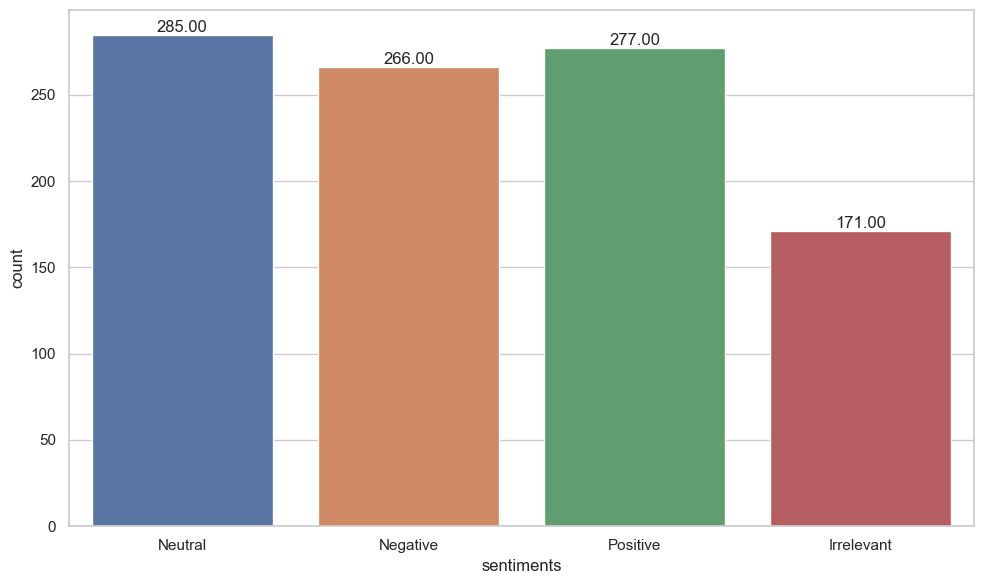

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiments', data=df)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.tight_layout()
plt.show()


In [13]:


df_copy = df.copy()

ordinal_encoder = OrdinalEncoder()

# Every single column with categorical values will be converted.
object_cols = ['sentiments']
df_copy[object_cols] = df_copy[object_cols].astype(str)

df_copy[object_cols] = ordinal_encoder.fit_transform(df_copy[object_cols])

df_copy.head()

# ordinal_encoder = OrdinalEncoder()

# # Every single column with categorical values will be converted.
# object_cols = ['tweet_id', 'sentiments', 'tweets']
# df[object_cols] = df[object_cols].astype(str)

# df[object_cols] = ordinal_encoder.fit_transform(df[object_cols])

df.head()


,tweet_id,sentiments,tweets
0,434.0,2.0,90.0
1,854.0,1.0,580.0
2,505.0,1.0,177.0
3,511.0,2.0,708.0
4,660.0,1.0,407.0


In [14]:
print(df['sentiments'].nunique())

4


# Transformers and Pytorch Models

In [16]:
df.head()

,tweet_id,sentiments,tweets
0,434.0,2.0,90.0
1,854.0,1.0,580.0
2,505.0,1.0,177.0
3,511.0,2.0,708.0
4,660.0,1.0,407.0


# CNN Model

In [17]:
df_train = train_df_copy["tweets"]
y_train = train_df_copy["sentiments"]

df_test_f = df_copy["tweets"]
y_test_f = df_copy["sentiments"]

# CNN
from sklearn.model_selection import train_test_split

df_train, df_test, y_train, y_test = train_test_split(
    train_df_copy["tweets"], train_df_copy["sentiments"], test_size=0.2
)

# df_train.to_csv("train_data.csv")


from tensorflow.keras.preprocessing.text import Tokenizer

max_words = 10000
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(df_train)
sequence_train = tokenizer.texts_to_sequences(df_train)
sequence_test = tokenizer.texts_to_sequences(df_test)
seq_test = tokenizer.texts_to_sequences(df_test_f)
word2vec = tokenizer.word_index
V = len(word2vec)
print("dataset has %s number of independent tokens" % V)
from tensorflow.keras.preprocessing.sequence import pad_sequences

data_train = pad_sequences(sequence_train)
data_train.shape
T = data_train.shape[1]
data_test = pad_sequences(sequence_test, maxlen=T)
data_test_f = pad_sequences(seq_test,maxlen=T)
# data_test.shape
from tensorflow.keras.layers import (
    Input,
    Conv1D,
    MaxPooling1D,
    Dense,
    GlobalMaxPooling1D,
    Embedding,
)
from tensorflow.keras.models import Model
from keras.layers import Dropout

D = 20
i = Input((T,))
x = Embedding(V + 1, D)(i)
# x=Conv1D(16,3,activation='relu')(x)
# x=MaxPooling1D(3)(x)
x = Conv1D(32, 3, activation="relu")(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation="relu")(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation="relu")(x)
x = GlobalMaxPooling1D()(x)

x = Dense(256, activation="relu")(x)
x = Dropout(0.075)(x)
x = Dense(4, activation="softmax")(x)
# x = Dropout(0.)(x)
model = Model(i, x)
model.summary()
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)
cnn_senti = model.fit(
    data_train, y_train, validation_data=(data_test, y_test), epochs=50, batch_size=100
)
# Get the history dictionary
history_dict = cnn_senti.history


# Print the accuracy, precision and loss from the last epoch
print("CNN Accuracy: ", history_dict["accuracy"][-1])
# print("CNN Precision: ", history_dict["precision_9"][-1])
# print("CNN Recall: ", history_dict["recall_9"][-1])
# print("CNN Loss: ", history_dict["loss"][-1])

2023-11-17 21:11:20.608908: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


dataset has 25827 number of independent tokens
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 163)]             0         
                                                                 
 embedding (Embedding)       (None, 163, 20)           516560    
                                                                 
 conv1d (Conv1D)             (None, 161, 32)           1952      
                                                                 
 max_pooling1d (MaxPooling1  (None, 53, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 51, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 17, 64)            0         
 g1D)         

In [18]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(data_test_f, y_test_f)

# Print the test accuracy
print("CNN Test Accuracy:", accuracy)
print("CNN Test Loss:", loss)

32/32 [==============================] - 0s 3ms/step - loss: 1.0592 - accuracy: 0.8819
CNN Test Accuracy: 0.8818818926811218
CNN Test Loss: 1.0592312812805176


# Preprocessing for LSTM and BiLSTM Models

In [20]:
###LSTM

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import BatchNormalization

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2

# df_train = train_df_copy["tweets"]
# y_train = train_df_copy["sentiments"]

X_test = df_copy["tweets"]
y_test = df_copy["sentiments"]

labels = train_df_copy["sentiments"].values.tolist()
num_labels = len(np.unique(labels))
vocab_size = len(np.unique(train_df_copy["tweets"].values.tolist()))
X_train = train_df_copy["tweets"].values.tolist()
y_train = labels


le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train = to_categorical(y_train)
y_test = le.transform(y_test)
y_test = to_categorical(y_test)
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
sequence_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=sequence_length)
X_test_padded = pad_sequences(X_test_seq,maxlen=sequence_length)
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_padded, y_train, test_size=0.2, random_state=42
)


# LSTM Model

In [21]:
# Evaluate the LSTM model on test data
from tensorflow.keras.models import load_model

model = load_model("LSTM.h5")

loss, accuracy, precision, recall = model.evaluate(X_test_padded, y_test)

# Print the test accuracy
print("LSTM Test Accuracy:", accuracy)
print("LSTM Test Loss:", loss)

32/32 [==============================] - 4s 110ms/step - loss: 0.3577 - accuracy: 0.9189 - precision_6: 0.9309 - recall_6: 0.9039
LSTM Test Accuracy: 0.9189189076423645
LSTM Test Loss: 0.357718288898468


# BiLSTM Model

In [22]:
# Evaluate the BiLSTM model on test data
from tensorflow.keras.models import load_model

model = load_model("BiLSTM.h5")

loss, accuracy, precision, recall = model.evaluate(X_test_padded, y_test)

# Print the test accuracy
print("BiLSTM Test Accuracy:", accuracy)
print("BiLSTM Test Loss:", loss)

32/32 [==============================] - 4s 71ms/step - loss: 0.4878 - accuracy: 0.9159 - precision_9: 0.9251 - recall_9: 0.9019
BiLSTM Test Accuracy: 0.9159159064292908
BiLSTM Test Loss: 0.4878270626068115
